## Test agency historic budget data

In [5]:
pip install awswrangler

Note: you may need to restart the kernel to use updated packages.


In [6]:
import sys
!{sys.executable} -m pip install PyAthena

In [7]:
import awswrangler as wr
import pandas as pd
import datetime as dt
from datetime import datetime
from pyathena import connect

## TIME PERIOD OF DATASET

### DFs generation

In [13]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
table_name = 'locations'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df1 = pd.read_sql(f'SELECT vp FROM {origin_name}.{database_name}.{table_name};', conn)

# trae la tabla entera, el tema está en pasar una query completa de sql, determinadas columnas en el select se las banca

/tmp/ipykernel_21/731752826.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(f'SELECT vp FROM {origin_name}.{database_name}.{table_name};', conn)


In [14]:
df1

,vp
0,andres.fulgencio@viamericas.com
1,randy.ostler@viamericas.com
2,randy.ostler@viamericas.com
3,randy.ostler@viamericas.com
4,andres.fulgencio@viamericas.com
...,...
23284,hugo.ucelo@viamericas.com
23285,andres.fulgencio@viamericas.com
23286,hugo.ucelo@viamericas.com
23287,hugo.ucelo@viamericas.com


In [7]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
#origin_name = 'AwsDataCatalog'
#database_name = 'viamericas'
#table_name = 'locations'
#condition = '"FL0%"'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT * FROM AwsDataCatalog.viamericas.locations WHERE id like 'FL0%'; ''', conn)

/tmp/ipykernel_17/3918688316.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT * FROM AwsDataCatalog.viamericas.locations WHERE id like 'FL0%'; ''', conn)


In [8]:
df.head()

,fax,main_branches,days_last_visit,date_agreement,amount_last_week,vp,state_budget,date_is_viacheck,mom_mtd_performance_category,fin_closing_day,...,id_salesforce,type,last_month_hwm_performance,sales_representative,related_reason,mean_days_inactive,is_reopen,last_sync,payments_made,mtd_count_viatopups
0,,TS02(0),None,None,NaN,None,None,None,None,None,...,0013j00002zoF0NAAU,Not in budget,NaN,TEST AGENCIES,NaN,None,None,NaT,None,NaN
1,3055033110,"D551(0),F033(0)",None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0OAAU,Not in budget,NaN,VIALOCAL,NaN,None,None,NaT,None,NaN
2,3054776741,F005(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0PAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN
3,9549795992,F003(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0QAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN
4,3053862747,F004(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0RAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN


In [9]:
df.shape

(819, 196)

In [ ]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT id_main_branch, balance, dso_pastdue, dso_deposit_day, day FROM AwsDataCatalog.viamericas.history_balance WHERE id_main_branch LIKE 'F%' order by day DESC; ''', conn)

/tmp/ipykernel_17/1901365188.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT id_main_branch, balance, dso_pastdue, dso_deposit_day, day FROM AwsDataCatalog.viamericas.history_balance WHERE id_main_branch LIKE 'F%' order by day DESC; ''', conn)


In [ ]:
df.head()

,id_main_branch,balance,dso_pastdue,dso_deposit_day,day
0,F521,0.0000,NaN,NaN,2024-02-04
1,F033,0.0000,NaN,NaN,2024-02-04
2,F776,0.0000,NaN,NaN,2024-02-04
3,F520,0.0048,NaN,NaN,2024-02-04
4,F032,0.0000,NaN,NaN,2024-02-04


In [16]:
df521 = df[df['id_main_branch']== 'F520']

<Axes: >

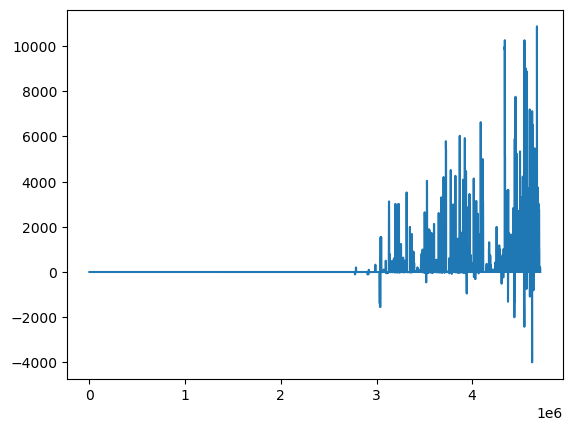

In [22]:
df521.balance.plot(x='day')

<Axes: >

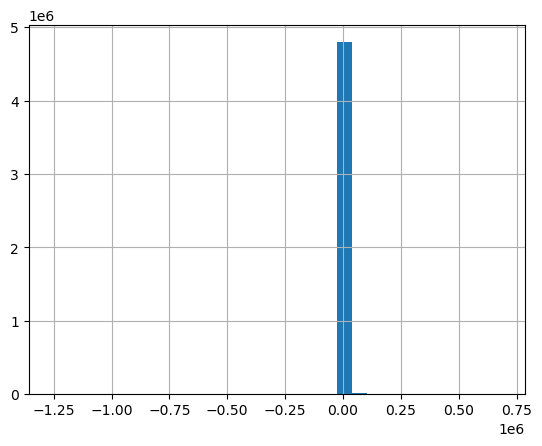

In [25]:
df['balance'].hist(bins=30)

<Axes: >

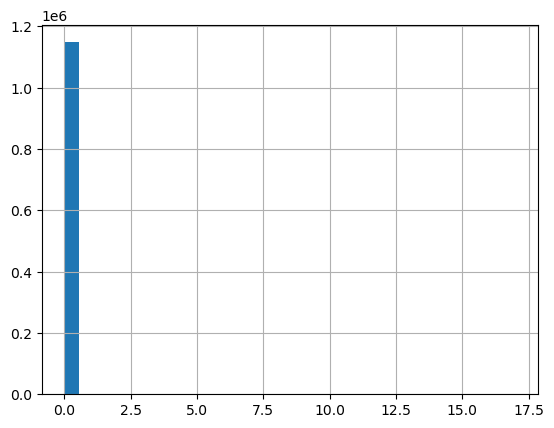

In [26]:
df['dso_pastdue'].hist(bins=30)

In [29]:
df['dso_deposit_day'].unique()

array([ nan,   0.,   1.,  15.,   4.,   2.,   3.,   6.,  24.,  23.,  22.,
         5.,  16.,  14.,   7.,   9.,   8., 235., 379., 374., 373., 372.,
       365., 304., 303., 302., 169., 163., 162., 155., 134., 120.,  78.,
        11.,  44.,  43.,  64.,  52.,  51.,  50.,  38.,  37.,  36.,  31.,
        30.,  29., 318., 317., 297., 296., 295., 277., 248., 247., 246.,
       213., 212., 211., 170.,  87.,  86.,  85.,  73.,  72.,  71.,  65.,
        59.,  58.,  57.])

In [30]:
df['id_main_branch'].unique()

array(['F521', 'F033', 'F776', 'F520', 'F032', 'F099', 'F519', 'F774',
       'F777', 'F518', 'F773', 'F778', 'F517', 'F030', 'F779', 'F516',
       'F029', 'F780', 'F515', 'F772', 'F781', 'F514', 'F771', 'F782',
       'F513', 'F028', 'F183', 'F512', 'F027', 'F184', 'F511', 'F026',
       'F185', 'F510', 'F770', 'F783', 'F509', 'F025', 'F784', 'F508',
       'F024', 'F785', 'F507', 'F023', 'F786', 'F506', 'F022', 'F787',
       'F505', 'F020', 'F788', 'F504', 'F769', 'F789', 'F503', 'F768',
       'F790', 'F502', 'F019', 'F186', 'F501', 'F767', 'F187', 'F500',
       'F766', 'F188', 'F499', 'F765', 'F189', 'F498', 'F764', 'F190',
       'F497', 'F763', 'F192', 'F496', 'F018', 'F193', 'F495', 'F017',
       'F791', 'F494', 'F762', 'F792', 'F493', 'F761', 'F198', 'F492',
       'F760', 'F793', 'F491', 'F758', 'F199', 'F490', 'F016', 'F200',
       'F489', 'F015', 'F794', 'F488', 'F014', 'F796', 'F487', 'F013',
       'F797', 'F486', 'F012', 'F798', 'F485', 'F756', 'F799', 'F484',
      

## Con los datos utilizados en el alarmado de KPR1

In [7]:
df = pd.read_csv('first_45_days_branch.csv')

In [9]:
df.describe()

,DAYS,COUNT,AMOUNT,GP
count,190779.000000,190779.000000,190779.000000,190779.000000
mean,22.399682,4.878163,2292.060546,13.967231
std,13.278708,10.570094,5548.596582,37.187106
min,0.000000,-10.000000,-10938.000000,-1717.310000
25%,11.000000,0.000000,0.000000,0.000000
50%,22.000000,1.000000,300.000000,2.250000
75%,34.000000,5.000000,2385.000000,13.900000
max,45.000000,439.000000,363209.000000,1820.510000


In [10]:
df.head()

,ID_BRANCH,ID_LOCATION,DATE,DAYS,DayOfWeekName,COUNT,AMOUNT,GP,FIRST_DAY
0,A00009,FL2606,2023-11-08,0,Wed,0,0,0.0,Wed
1,A00009,FL2606,2023-11-09,1,Thu,0,0,0.0,Wed
2,A00009,FL2606,2023-11-10,2,Fri,0,0,0.0,Wed
3,A00009,FL2606,2023-11-11,3,Sat,0,0,0.0,Wed
4,A00009,FL2606,2023-11-12,4,Sun,0,0,0.0,Wed


In [12]:
df['ID_LOCATION'].nunique()

4314

In [14]:
df.shape

(190779, 9)

In [15]:
df['FIRST_DAY'].unique()

array(['Wed', nan, 'Fri', 'Thu', 'Mon', 'Tue', 'Sat', 'Sun'], dtype=object)

In [18]:
df_location = df.groupby('FIRST_DAY')['ID_LOCATION'].nunique()
df_location = pd.DataFrame(df_location)

In [19]:
df_location

,ID_LOCATION
FIRST_DAY,
Fri,831
Mon,625
Sat,327
Sun,1
Thu,865
Tue,755
Wed,794


In [20]:
df_location['mean_amount'] = df.groupby('FIRST_DAY')['AMOUNT'].mean()
df_location

,ID_LOCATION,mean_amount
FIRST_DAY,,
Fri,831,2369.433521
Mon,625,2037.936813
Sat,327,2183.001973
Sun,1,4525.369565
Thu,865,2337.517352
Tue,755,2597.205278
Wed,794,2086.788739


In [21]:
df_location['mean_trxcnt'] = df.groupby('FIRST_DAY')['COUNT'].mean()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt
FIRST_DAY,,,
Fri,831,2369.433521,4.996737
Mon,625,2037.936813,4.322117
Sat,327,2183.001973,4.605469
Sun,1,4525.369565,11.565217
Thu,865,2337.517352,4.954764
Tue,755,2597.205278,5.621137
Wed,794,2086.788739,4.462548


In [22]:
df_location['max_trxcnt'] = df.groupby('FIRST_DAY')['COUNT'].max()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt,max_trxcnt
FIRST_DAY,,,,
Fri,831,2369.433521,4.996737,439
Mon,625,2037.936813,4.322117,118
Sat,327,2183.001973,4.605469,144
Sun,1,4525.369565,11.565217,33
Thu,865,2337.517352,4.954764,265
Tue,755,2597.205278,5.621137,429
Wed,794,2086.788739,4.462548,151


In [23]:
df_location['max_amount'] = df.groupby('FIRST_DAY')['AMOUNT'].max()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt,max_trxcnt,max_amount
FIRST_DAY,,,,,
Fri,831,2369.433521,4.996737,439,352927
Mon,625,2037.936813,4.322117,118,81317
Sat,327,2183.001973,4.605469,144,74359
Sun,1,4525.369565,11.565217,33,15305
Thu,865,2337.517352,4.954764,265,149229
Tue,755,2597.205278,5.621137,429,363209
Wed,794,2086.788739,4.462548,151,87870


In [24]:
df.nlargest(10, 'AMOUNT')

,ID_BRANCH,ID_LOCATION,DATE,DAYS,DayOfWeekName,COUNT,AMOUNT,GP,FIRST_DAY
62908,A23207,CA4232,2022-10-15,25,Sat,429,363209,-40.98,Tue
94207,A23916,FL2272,2023-03-26,44,Sun,439,352927,163.45,Fri
62894,A23207,CA4232,2022-10-01,11,Sat,250,263006,2.20,Tue
62922,A23207,CA4232,2022-10-29,39,Sat,366,241471,-658.60,Tue
94206,A23916,FL2272,2023-03-25,43,Sat,305,214366,357.69,Fri
52434,A22961,MS0182,2022-09-10,39,Sat,390,191005,1099.47,Tue
94200,A23916,FL2272,2023-03-19,37,Sun,241,188221,934.12,Fri
94199,A23916,FL2272,2023-03-18,36,Sat,266,171375,1114.71,Fri
180788,A25863,NY1559,2024-01-08,25,Mon,115,149229,331.50,Thu
3718,A21763,AZ0157,2021-12-10,41,Fri,242,140899,398.60,NaN


# correlaciones?

In [ ]:
# Traer data de trx y montos

In [ ]:
#CREATE TABLE analytics.daily_check AS
SELECT
   CAST(RTRIM(p.id_main_branch_sent) AS VARCHAR(60)) AS AGENCY,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-11-30 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(p.id_main_branch_sent),
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE)

In [13]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT
   CAST(RTRIM(b.ID_LOCATION) AS VARCHAR(60)) AS AGENCY,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT,
   c.BALANCE as BALANCE
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
   LEFT JOIN AwsDataCatalog.viamericas.history_balance c ON c.id_main_branch = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END and c.day = a.day
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-12-31 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(b.ID_LOCATION),
   c.BALANCE, 
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE); ''', conn)

/tmp/ipykernel_35/2431367731.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT


In [14]:
df

,AGENCY,DATE,TX,AMOUNT,BALANCE
0,NC1299,2024-01-27,109,42296.97,None
1,GA1154,2024-01-19,44,29353.00,None
2,NC1477,2024-01-06,9,4363.00,None
3,AZ0204,2024-01-30,9,1730.00,None
4,NJ0926,2024-01-25,3,710.00,None
...,...,...,...,...,...
153535,NC1502,2024-01-13,1,200.00,None
153536,FL2244,2024-01-18,2,1900.00,None
153537,TX1471,2024-01-12,20,5111.00,None
153538,CA4179,2024-01-15,1,120.00,None


In [15]:
df.describe()

,TX,AMOUNT
count,153540.000000,153540.000000
mean,15.183685,6863.486194
std,20.965634,10656.513004
min,0.000000,0.000000
25%,3.000000,1090.000000
50%,8.000000,3338.370000
75%,19.000000,8395.000000
max,522.000000,380956.170000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153540 entries, 0 to 153539
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   AGENCY   153540 non-null  object 
 1   DATE     153540 non-null  object 
 2   TX       153540 non-null  int64  
 3   AMOUNT   153540 non-null  float64
 4   BALANCE  0 non-null       object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.9+ MB


In [18]:
35932/69159 #casi 50% sin hsitory_balance sumando otro mes da el mismo % de missing, toamndo más historial desde enero 2023 sube a 51%

0.5195563845631082

## Control charts

In [ ]:
import matplotlib.pyplot as plt
from ControlCharts import ShewhartControlModel

In [ ]:
# Group data by day and take the average of the Squared Error
grouped_data= data[['Day', 'Squared Error']].groupby(by='Day').mean()
grouped_data_std= data[['Day', 'Squared Error']].groupby(by='Day').std()
# Train-Test Split
x_train= grouped_data.iloc[:25, :].values.reshape((25,))
x_test= grouped_data.iloc[25:, :].values.reshape((25,))

In [ ]:
# Estimate standard deviation
qcc= pd.read_csv('BiasControlConstants/quality_control_constants.csv')
n= 20 # varia según el número de días que una agencia estuvo activa...
c4= qcc['c4'].loc[n-2]
sigma_train=np.average(grouped_data_std.values[:25])/(np.sqrt(n)*c4)

In [ ]:
# Build Shewhart Control Model
spc_model= ShewhartControlModel(k=3)
ucl, lcl= spc_model.fit(x_train, sigma= sigma_train)
ooc= spc_model.predict(x_test)
testing_plot=spc_model.plot(x=x_test, dpi= 100)
# Plot all data
complete_plot= spc_model.plot(x=grouped_data.values, dpi= 100)
train_plot= spc_model.plot(x=x_train, dpi= 100)

In [37]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df1 = pd.read_sql('''SELECT id FROM AwsDataCatalog.viamericas.locations WHERE ID_GROUP_COMPANY LIKE 'T0137'; ''', conn)

/tmp/ipykernel_21/2057683596.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql('''SELECT id FROM AwsDataCatalog.viamericas.locations WHERE ID_GROUP_COMPANY LIKE 'T0137'; ''', conn)


In [38]:
df1

,id


In [161]:
# Convert the 'date' column to datetime format
df['day'] = pd.to_datetime(df['day'])
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df['payer_country'] = df['payer'] + '_' + df['country']
# Margin (when tx !=0)
df['margin'] = df.apply(lambda row: row['gp'] / row['tx'] if row['tx'] != 0 else 0, axis=1)
df['margin'] = df['margin'].apply(lambda x: float(x)).round(4)

In [162]:
# DATA RANGE
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]